In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential

In [5]:
dataset_train = pd.read_csv('trainset.csv')
dataset_train.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [7]:
train_set = dataset_train.iloc[:,1:2].values
print(type(train_set))

<class 'numpy.ndarray'>


In [8]:
train_set.shape

(1259, 1)

In [9]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_set)
training_set_scaled.shape

(1259, 1)

In [10]:
X_train_array = []
y_train_array = []
for i in range(60, 1259):
    X_train_array.append(training_set_scaled[i-60:i,0])
    y_train_array.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train_array), np.array(y_train_array)
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))

In [11]:
X_train.shape

(1199, 60)

In [12]:
length = 60
n_features = 1

In [46]:
model = Sequential([layers.SimpleRNN(42,input_shape=(60,1)),
                    layers.Dense(1)])

model.compile(optimizer='adam',loss='mse')
model.summary()

model.fit(X_train1,y_train,epochs=20, batch_size=32)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 42)                1848      
                                                                 
 dense_5 (Dense)             (None, 1)                 43        
                                                                 
Total params: 1891 (7.39 KB)
Trainable params: 1891 (7.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
38/38 [==============================] - 1s 7ms/step - loss: 0.0329
Epoch 2/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 3/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0014
Epoch 4/20
38/38 [==============================] - 0s 8ms/step - loss: 0.0011
Epoch 5/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 6/20
38/38 [=====

In [47]:
dataset_test = pd.read_csv('testset.csv')
test_set = dataset_test.iloc[:,1:2].values
test_set.shape

(125, 1)

In [48]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled=sc.transform(inputs)
X_test = []
y_test = []
for i in range(60,1384):
    X_test.append(inputs_scaled[i-60:i,0])
    y_test.append(inputs_scaled[i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

X_test.shape

(1324, 60, 1)

42/42 [==============================] - 0s 3ms/step


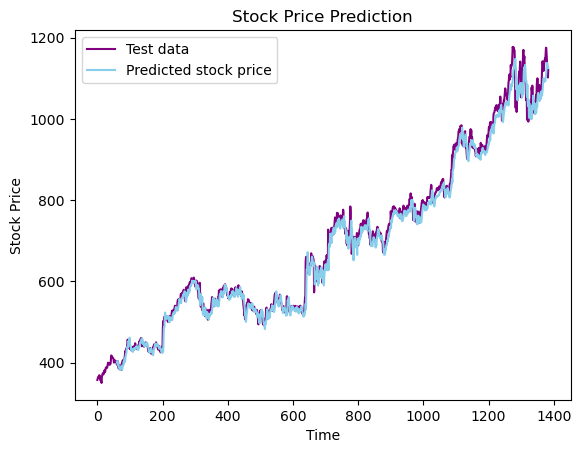

In [49]:
predicted_stock_price_scaled = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)

plt.plot(np.arange(0,1384),inputs, color='purple', label = 'Test data')
plt.plot(np.arange(60,1384),predicted_stock_price, color='skyblue', label = 'Predicted stock price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [50]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test,predicted_stock_price)

523426.3317323368